<a href="https://colab.research.google.com/github/saulotp/Friends_ds/blob/main/friends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Você é o responsável pela análise que servirá de alicerce para a defesa de uma 11ª temporada do seriado, que será apresentada para os investidores. Considerando os dados apresentados, elabore uma análise que responda as seguintes perguntas:

- Quais os padrões, tendências e principais características podemos observar nestes
dados?
- A sinopse, escritores e/ou diretor dos episódios influenciam na audiência?
- Usando uma técnica de previsão, qual seria a audiência de uma nova temporada?
- Imaginando que você poderia pedir para os produtores da série outras informações,
quais dados você acredita que enriqueceriam a análise e poderiam auxiliar na
previsão?

Primeiramente é necessário importar a biblioteca utilizada para a manipulação de tabelas (pandas)


In [1]:
import pandas as pd

Em seguida vou atribuir uma variável a base de dados e abrir o dataframe (Vou começar a chamar dataframe de DF a partir de agora) para ver como está a 'cara' dos dados



In [2]:
main_df = pd.read_excel('/content/drive/MyDrive/DS/DESAFIO1_friends_episodes_aud.xlsx')

main_df


,Temporada,Episodio,Exibicao_orig,Titulo_orig,Duracao,Sinopse_orig,Diretor,Escrito_por,Audiencia,Estrelas_IMDB,Votos_IMDB
0,1,1,22 de setembro de 1994,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,David Crane e Marta Kauffman,21.50,8.1,4888
1,1,2,29 de setembro de 1994,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,David Crane e Marta Kauffman,20.20,8.2,4605
2,1,3,6 de outubro de 1994,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,Jeffrey Astrof e Mike Sikowitz,19.50,8.1,4468
3,1,4,13 de outubro de 1994,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,Alexa Junge,19.70,8.5,4438
4,1,5,20 de outubro de 1994,The One with the Butt,22,Monica's obsessiveness is put to the test afte...,Arlene Sanford,Jeff Greenstein e Jeff Strauss,18.60,8.1,4274
...,...,...,...,...,...,...,...,...,...,...,...
230,10,231,19 de fevereiro de 2004,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,Sherry Bilsing-Graham e Ellen Plummer,24.27,8.6,2989
231,10,232,26 de fevereiro de 2004,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,História por : Robert Carlock | Roteiro por : ...,22.83,8.5,2771
232,10,233,22 de abril de 2004,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,História por : Mark Kunerth | Roteiro por : Da...,22.64,8.9,3141
233,10,234,29 de abril de 2004,The Last One,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,Andrew Reich e Ted Cohen,24.51,9.5,6221


In [3]:
main_df = pd.read_csv('/content/drive/MyDrive/DS/base.csv', sep=';', encoding='utf8')
main_df

,Unnamed: 0,Temporada,Episodio,Exibicao_orig,Titulo_orig,Duracao,Sinopse_orig,Diretor,Escrito_por,Audiencia,Estrelas_IMDB,Votos_IMDB
0,0,1,1,22 de setembro de 1994,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,David Crane e Marta Kauffman,21.50,8.1,4888
1,1,1,2,29 de setembro de 1994,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,David Crane e Marta Kauffman,20.20,8.2,4605
2,2,1,3,6 de outubro de 1994,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,Jeffrey Astrof e Mike Sikowitz,19.50,8.1,4468
3,3,1,4,13 de outubro de 1994,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,Alexa Junge,19.70,8.5,4438
4,4,1,5,20 de outubro de 1994,The One with the Butt,22,Monica's obsessiveness is put to the test afte...,Arlene Sanford,Jeff Greenstein e Jeff Strauss,18.60,8.1,4274
...,...,...,...,...,...,...,...,...,...,...,...,...
230,230,10,231,19 de fevereiro de 2004,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,Sherry Bilsing-Graham e Ellen Plummer,24.27,8.6,2989
231,231,10,232,26 de fevereiro de 2004,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,História por : Robert Carlock | Roteiro por : ...,22.83,8.5,2771
232,232,10,233,22 de abril de 2004,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,História por : Mark Kunerth | Roteiro por : Da...,22.64,8.9,3141
233,233,10,234,29 de abril de 2004,The Last One,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,Andrew Reich e Ted Cohen,24.51,9.5,6221


O comando display(df) mostra as 5 primeiras e 5 ultimas linhas do DF selecionado além de informações de quantas linhas e colunas ele possui, nesse caso o DF a ser analisado possui 235 linhas e 11 colunas. 
Se observarmos bem, as linhas 233 e 234 possuem o mesmo nome para o titulo do episódeo (The Last One), então para evitar problemas futuros com duplicação vou alterar o nome dos episódeos.

In [4]:
main_df.loc[233,'Titulo_orig'] = "The Last One I"
main_df.loc[234,"Titulo_orig"] = "The Last One II"

In [5]:
display(main_df)

,Unnamed: 0,Temporada,Episodio,Exibicao_orig,Titulo_orig,Duracao,Sinopse_orig,Diretor,Escrito_por,Audiencia,Estrelas_IMDB,Votos_IMDB
0,0,1,1,22 de setembro de 1994,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,David Crane e Marta Kauffman,21.50,8.1,4888
1,1,1,2,29 de setembro de 1994,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,David Crane e Marta Kauffman,20.20,8.2,4605
2,2,1,3,6 de outubro de 1994,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,Jeffrey Astrof e Mike Sikowitz,19.50,8.1,4468
3,3,1,4,13 de outubro de 1994,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,Alexa Junge,19.70,8.5,4438
4,4,1,5,20 de outubro de 1994,The One with the Butt,22,Monica's obsessiveness is put to the test afte...,Arlene Sanford,Jeff Greenstein e Jeff Strauss,18.60,8.1,4274
...,...,...,...,...,...,...,...,...,...,...,...,...
230,230,10,231,19 de fevereiro de 2004,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,Sherry Bilsing-Graham e Ellen Plummer,24.27,8.6,2989
231,231,10,232,26 de fevereiro de 2004,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,História por : Robert Carlock | Roteiro por : ...,22.83,8.5,2771
232,232,10,233,22 de abril de 2004,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,História por : Mark Kunerth | Roteiro por : Da...,22.64,8.9,3141
233,233,10,234,29 de abril de 2004,The Last One I,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,Andrew Reich e Ted Cohen,24.51,9.5,6221


Como nosso DF possui 235 linhas, ficaria bem complicado de consultar outros valores que possivelmente estivessem duplicados, então usei uma linha de comando onde ela irá somar quantos valores estão iguais e retornará a soma como resultado, assim podemos saber se existem mais valores iguais na coluna dos nomes de episódeos sem ter que olhar linha por linha.

In [6]:
main_df['Titulo_orig'].duplicated().sum()

4

Como o script nos retornou o valor 4, quer dizer que ainda temos mais 4 valores (ou nomes) iguais, então agora podemos localiza-los para alterar seus nomes.

In [7]:
eps_duplicados = main_df[main_df['Titulo_orig'].duplicated()]

display(eps_duplicados)

,Unnamed: 0,Temporada,Episodio,Exibicao_orig,Titulo_orig,Duracao,Sinopse_orig,Diretor,Escrito_por,Audiencia,Estrelas_IMDB,Votos_IMDB
95,95,4,96,7 de maio de 1998,The One with Ross's Wedding,30,Phoebe tries to warn the gang that Rachel is c...,Kevin Bright,Michael Borkow,31.60,9.2,4217
135,135,6,136,17 de fevereiro de 2000,The One That Could Have Been,30,The gang continue to think about how different...,Michael Lembeck,Gregory S. Malins e Adam Chase,20.70,8.5,3037
144,144,6,145,18 de maio de 2000,The One with the Proposal,30,Chandler continues to pretend to hate the idea...,Kevin Bright,Shana Goldberg-Meehan e Scott Silveri,30.70,9.3,4186
216,216,9,217,15 de maio de 2003,The One in Barbados,22,"To the other friends' fury, it keeps raining e...",Kevin Bright,Shana Goldberg-Meehan e Scott Silveri,25.46,8.6,2844


Um ponto importante é que o pandas vai selecionar por padrão a ultima linha com o valor duplicado, então sabemos que no index 95 temos um valor duplicado na coluna do titulo do episódeo, entretanto não sabemos se o nome anterior é o valor duplicado (index 94). Então antes de mais nada vou consultar a linha com index 94 para saber se o episódeo anteior é o que está com o mesmo valor. (Teoricamente deve ser, uma vez que não faria sentido termos um EP e sua continuação em outra temporada por exemplo, então teoricamente o valor duplicado deve ser o antecessor)

In [8]:
print(main_df.loc[94,'Titulo_orig'])
print(main_df.loc[95,"Titulo_orig"])

print(main_df.loc[143,'Titulo_orig'])
print(main_df.loc[144,"Titulo_orig"])

print(main_df.loc[134,'Titulo_orig'])
print(main_df.loc[135,"Titulo_orig"])

print(main_df.loc[215,'Titulo_orig'])
print(main_df.loc[216,"Titulo_orig"])

The One with Ross's Wedding
The One with Ross's Wedding
The One with the Proposal
The One with the Proposal
The One That Could Have Been
The One That Could Have Been
The One in Barbados
The One in Barbados


Localizados os eps com os mesmos nome, faremos a mudança como ja feito anteriormente

In [9]:
main_df.loc[233,'Titulo_orig'] = "The Last One I"
main_df.loc[234,"Titulo_orig"] = "The Last One II"


main_df.loc[94,'Titulo_orig'] = "The One with Ross's Wedding I"
main_df.loc[95,"Titulo_orig"] = "The One with Ross's Wedding II"

main_df.loc[143,'Titulo_orig'] = "The One with the Proposal I"
main_df.loc[144,"Titulo_orig"] = "The One with the Proposal II"


main_df.loc[134,'Titulo_orig'] = "The One That Could Have Been I"
main_df.loc[135,"Titulo_orig"] = "The One That Could Have Been II"

main_df.loc[215,'Titulo_orig'] = "The One in Barbados I"
main_df.loc[216,"Titulo_orig"] = "The One in Barbados II"


Após feita a mudança nos nomes, podemos rodar o script para verificar se temos mais dados duplicados na coluna de nomes dos EPs.

In [10]:
main_df['Titulo_orig'].duplicated().sum()

0

Agora sem nomes duplicados, podemos passar para o proximo passo, verificar se o DF possui algum campo nulo. 

In [11]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     235 non-null    int64  
 1   Temporada      235 non-null    int64  
 2   Episodio       235 non-null    int64  
 3   Exibicao_orig  233 non-null    object 
 4   Titulo_orig    235 non-null    object 
 5   Duracao        235 non-null    int64  
 6   Sinopse_orig   235 non-null    object 
 7   Diretor        235 non-null    object 
 8   Escrito_por    235 non-null    object 
 9   Audiencia      233 non-null    float64
 10  Estrelas_IMDB  235 non-null    float64
 11  Votos_IMDB     235 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 22.2+ KB


Com isso, sabemos que temos 4 campos nulos, 2 na coluna 'Exibicao_orig' e outros 2 na coluna 'Audiencia' , como são poucos, vou apenas excluir as linhas com esse campos.

In [12]:
main_df = main_df.dropna()
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 234
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     233 non-null    int64  
 1   Temporada      233 non-null    int64  
 2   Episodio       233 non-null    int64  
 3   Exibicao_orig  233 non-null    object 
 4   Titulo_orig    233 non-null    object 
 5   Duracao        233 non-null    int64  
 6   Sinopse_orig   233 non-null    object 
 7   Diretor        233 non-null    object 
 8   Escrito_por    233 non-null    object 
 9   Audiencia      233 non-null    float64
 10  Estrelas_IMDB  233 non-null    float64
 11  Votos_IMDB     233 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 23.7+ KB


Agora com o DF aparentemente sem valores nulos ou duplicados, podemos iniciar a análise exploratória.

In [13]:
display(main_df)


,Unnamed: 0,Temporada,Episodio,Exibicao_orig,Titulo_orig,Duracao,Sinopse_orig,Diretor,Escrito_por,Audiencia,Estrelas_IMDB,Votos_IMDB
0,0,1,1,22 de setembro de 1994,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,David Crane e Marta Kauffman,21.50,8.1,4888
1,1,1,2,29 de setembro de 1994,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,David Crane e Marta Kauffman,20.20,8.2,4605
2,2,1,3,6 de outubro de 1994,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,Jeffrey Astrof e Mike Sikowitz,19.50,8.1,4468
3,3,1,4,13 de outubro de 1994,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,Alexa Junge,19.70,8.5,4438
4,4,1,5,20 de outubro de 1994,The One with the Butt,22,Monica's obsessiveness is put to the test afte...,Arlene Sanford,Jeff Greenstein e Jeff Strauss,18.60,8.1,4274
...,...,...,...,...,...,...,...,...,...,...,...,...
230,230,10,231,19 de fevereiro de 2004,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,Sherry Bilsing-Graham e Ellen Plummer,24.27,8.6,2989
231,231,10,232,26 de fevereiro de 2004,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,História por : Robert Carlock | Roteiro por : ...,22.83,8.5,2771
232,232,10,233,22 de abril de 2004,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,História por : Mark Kunerth | Roteiro por : Da...,22.64,8.9,3141
233,233,10,234,29 de abril de 2004,The Last One I,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,Andrew Reich e Ted Cohen,24.51,9.5,6221


Inicialmente farei a contagem dos EPs por temporada.

In [14]:
main_df['Temporada'].value_counts().sort_index()

1     23
2     24
3     25
4     24
5     24
6     25
7     24
8     23
9     23
10    18
Name: Temporada, dtype: int64

Para melhor visualização vou utilizar gráficos

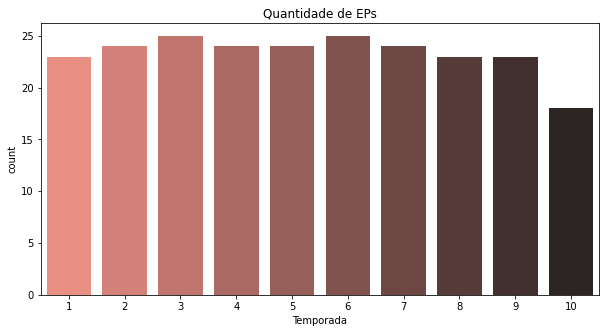

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
plt.xlabel("Temporada")
plt.title("Quantidade de EPs")
sns.countplot(x = "Temporada", data = main_df, palette='dark:salmon_r')

É possível observar que as temporadas 3 e 6 possuem mais número de EPs, enquanto a ultima temporada foi a que teve a menor quantidade. (Por enquanto esses dados não querem dizer nada, mas a idéia a princípio seria relacionar a quantidade de EPs com os indices de audiencia e ver se os dados 'conversam'.

Agora veremos a duração das temporadas em minutos

In [16]:
duracao_df = main_df.groupby('Temporada').Duracao.sum().to_frame().reset_index()
display(duracao_df)

,Temporada,Duracao
0,1,506
1,2,528
2,3,550
3,4,544
4,5,528
5,6,582
6,7,528
7,8,506
8,9,522
9,10,412


(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 <a list of 8 Text major ticklabel objects>)

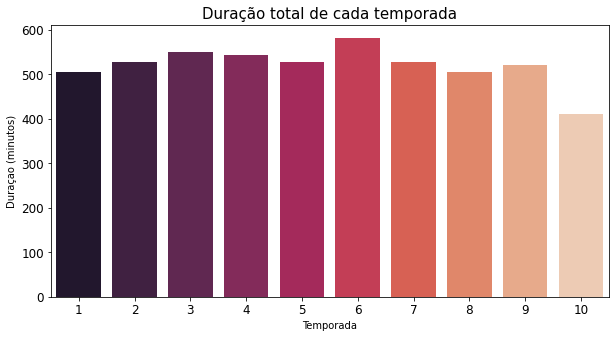

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x=duracao_df.Temporada, y=duracao_df.Duracao, palette='rocket')
plt.title('Duração total de cada temporada', fontsize=15)
plt.xlabel('Temporada')
plt.ylabel('Duraçao (minutos)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

Os dados demonstram que mesmo algumas temporadas possuindo a mesma quantidade de EPs, a duração em minutos pode variar. Além disso, agora sabemos que a temporada 6 possui maior quantidade de EPs e maior duração em relação as demais temporadas, em contraste a temporada 10 possui a menor quantidade de EPs e menor duração em minutos também.

Vamos verificar agora a média de audiencia que cada temporada obteve.

In [18]:
audienciaxtemp_df = main_df[['Temporada', 'Audiencia']].groupby('Temporada', as_index=False).mean()
audienciaxtemp_df = audienciaxtemp_df.sort_values(by='Audiencia', ascending=False)
display(audienciaxtemp_df)


,Temporada,Audiencia
8,9,113.351304
1,2,31.816667
7,8,26.364348
2,3,26.316000
4,5,24.983333
3,4,24.833333
9,10,24.629444
0,1,24.508696
5,6,22.424000
6,7,22.078333


Após organizar de maneira decrescente a média que cada temporada teve, é possível notar que a temporada 9 teve 4 vezes mais audiencia que as outras. Caso não seja um erro nos valores da tabela devemos fazer uma análise direcionada principalmente à essa temporada. Por hora vamos verificar os valores contidos na coluna de audiencia só da temporada 9.

In [19]:
display(main_df.loc[main_df['Temporada'] == 9])

,Unnamed: 0,Temporada,Episodio,Exibicao_orig,Titulo_orig,Duracao,Sinopse_orig,Diretor,Escrito_por,Audiencia,Estrelas_IMDB,Votos_IMDB
194,194,9,195,26 de setembro de 2002,The One Where Emma Cries,22,"Chandler, having trouble getting enough sleep ...",Sheldon Epps,Sherry Bilsing-Graham e Ellen Plummer,34.01,8.5,2957
195,195,9,196,3 de outubro de 2002,The One with the Pediatrician,22,Joey arranges a blind date for Phoebe. Chandle...,Roger Christiansen,Dana Klein Borkow,28.93,8.2,2733
196,196,9,197,10 de outubro de 2002,The One with the Sharks,22,Monica thinks Chandler is aroused by shark doc...,Ben Weiss,Brian Buckner e Sebastian Jones,26.63,8.2,2764
197,197,9,198,17 de outubro de 2002,The One with Phoebe's Birthday Dinner,22,Phoebe will celebrate her birthday by having a...,David Schwimmer,Andrew Reich e Ted Cohen,25.82,8.5,2799
198,198,9,199,31 de outubro de 2002,The One with the Male Nanny,22,"Looking for a new nanny, Ross and Rachel hire ...",Kevin Bright,Scott Silveri,24.46,8.4,2961
199,199,9,200,7 de novembro de 2002,The One with Ross's Inappropriate Song,22,Ross finds a way to make Emma laugh - singing ...,Gary Halvorson,David Crane e Marta Kauffman,27.51,8.7,2971
200,200,9,201,14 de novembro de 2002,The One with Rachel's Other Sister,22,Rachel's middle sister shows up at Thanksgivin...,Kevin Bright,Robert Carlock,25.35,8.8,3273
201,201,9,202,21 de novembro de 2002,The One with Rachel's Phone Number,22,Rachel is ready to start hanging out again. Sh...,Ben Weiss,Shana Goldberg-Meehan,26.76,8.2,2702
202,202,9,203,5 de dezembro de 2002,The One with Christmas in Tulsa,22,"Chandler must spend Christmas in Tulsa, which ...",Kevin Bright,Mark Kunerth,25.43,7.5,2804
203,203,9,204,12 de dezembro de 2002,The One Where Rachel Goes Back to Work,22,Chandler starts looking for a job and is anxio...,Gary Halvorson,Doty Abrams,22.29,8.0,2601


Como esperado, existe um erro de digitação do indice de audiencia no EP 212 onde temos o valor de 2079 na audiencia, e seguindo o padrão do restante do DF o correto seria 20,79. Por isso deu aquela diferença tão grande na média desta temporada, vamos concertar o valor e continuar com a analise.

In [20]:
main_df.loc[211,'Audiencia'] = 20.79

display(main_df.loc[main_df['Temporada'] == 9])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Unnamed: 0,Temporada,Episodio,Exibicao_orig,Titulo_orig,Duracao,Sinopse_orig,Diretor,Escrito_por,Audiencia,Estrelas_IMDB,Votos_IMDB
194,194,9,195,26 de setembro de 2002,The One Where Emma Cries,22,"Chandler, having trouble getting enough sleep ...",Sheldon Epps,Sherry Bilsing-Graham e Ellen Plummer,34.01,8.5,2957
195,195,9,196,3 de outubro de 2002,The One with the Pediatrician,22,Joey arranges a blind date for Phoebe. Chandle...,Roger Christiansen,Dana Klein Borkow,28.93,8.2,2733
196,196,9,197,10 de outubro de 2002,The One with the Sharks,22,Monica thinks Chandler is aroused by shark doc...,Ben Weiss,Brian Buckner e Sebastian Jones,26.63,8.2,2764
197,197,9,198,17 de outubro de 2002,The One with Phoebe's Birthday Dinner,22,Phoebe will celebrate her birthday by having a...,David Schwimmer,Andrew Reich e Ted Cohen,25.82,8.5,2799
198,198,9,199,31 de outubro de 2002,The One with the Male Nanny,22,"Looking for a new nanny, Ross and Rachel hire ...",Kevin Bright,Scott Silveri,24.46,8.4,2961
199,199,9,200,7 de novembro de 2002,The One with Ross's Inappropriate Song,22,Ross finds a way to make Emma laugh - singing ...,Gary Halvorson,David Crane e Marta Kauffman,27.51,8.7,2971
200,200,9,201,14 de novembro de 2002,The One with Rachel's Other Sister,22,Rachel's middle sister shows up at Thanksgivin...,Kevin Bright,Robert Carlock,25.35,8.8,3273
201,201,9,202,21 de novembro de 2002,The One with Rachel's Phone Number,22,Rachel is ready to start hanging out again. Sh...,Ben Weiss,Shana Goldberg-Meehan,26.76,8.2,2702
202,202,9,203,5 de dezembro de 2002,The One with Christmas in Tulsa,22,"Chandler must spend Christmas in Tulsa, which ...",Kevin Bright,Mark Kunerth,25.43,7.5,2804
203,203,9,204,12 de dezembro de 2002,The One Where Rachel Goes Back to Work,22,Chandler starts looking for a job and is anxio...,Gary Halvorson,Doty Abrams,22.29,8.0,2601


In [21]:
audienciaxtemp_df = main_df[['Temporada', 'Audiencia']].groupby('Temporada', as_index=False).mean()
audienciaxtemp_df = audienciaxtemp_df.sort_values(by='Audiencia', ascending=False)

display(audienciaxtemp_df)

,Temporada,Audiencia
1,2,31.816667
7,8,26.364348
2,3,26.316000
4,5,24.983333
3,4,24.833333
9,10,24.629444
0,1,24.508696
8,9,23.863913
5,6,22.424000
6,7,22.078333


(20.0, 35.0)

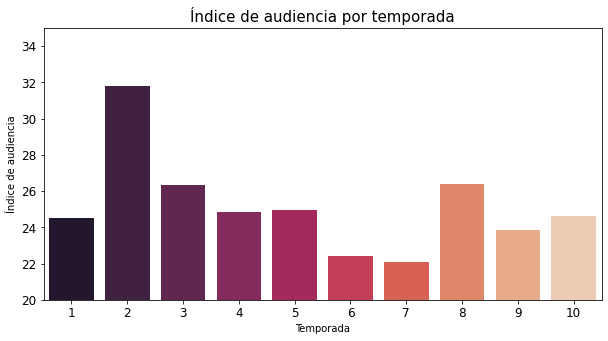

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x=audienciaxtemp_df.Temporada, y=audienciaxtemp_df.Audiencia, palette='rocket')
plt.title('Índice de audiencia por temporada', fontsize=15)
plt.xlabel('Temporada')
plt.ylabel('Índice de audiencia')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(20, 35)

A imagem acima mostra que a série teve seu pico de audiencia na segunda temporada, a partir da terceira os dados mostram uma queda gradativa até a sétima temporada. Na oitava temporada a audiencia conseguiu subir novamente até o nível de início da sua queda, entretanto o indice voltou a cair nas temporadas seguintes.

Agora irei fazer o mesmo procedimento só que com os dados do IMDB

In [23]:
estrelasxtemp_df = main_df[['Temporada', 'Estrelas_IMDB']].groupby('Temporada', as_index=False).mean()
estrelasxtemp_df = estrelasxtemp_df.sort_values(by='Estrelas_IMDB', ascending=False)

Votos_IMDB = main_df[['Temporada', 'Votos_IMDB']].groupby('Temporada', as_index=False).sum()
Votos_IMDB = Votos_IMDB.sort_values(by='Votos_IMDB', ascending=False)


display(estrelasxtemp_df)
display(Votos_IMDB)

,Temporada,Estrelas_IMDB
9,10,8.677778
4,5,8.637500
5,6,8.496000
3,4,8.475000
1,2,8.458333
6,7,8.437500
7,8,8.434783
2,3,8.408000
0,1,8.317391
8,9,8.278261


,Temporada,Votos_IMDB
0,1,95397
1,2,89014
2,3,86462
4,5,82942
3,4,81441
5,6,78827
6,7,70577
7,8,68604
9,10,65264
8,9,63315


A princípio, não parece haver nenhuma discrepancia nos dados, então irei plotar no gráfico para melhor vizualição

(8.0, 9.0)

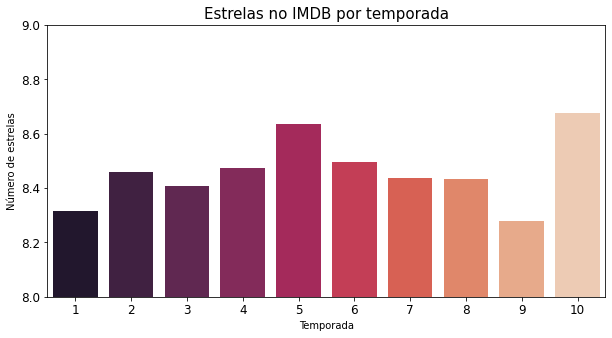

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x=estrelasxtemp_df.Temporada, y=estrelasxtemp_df.Estrelas_IMDB, palette='rocket')
plt.title('Estrelas no IMDB por temporada', fontsize=15)
plt.xlabel('Temporada')
plt.ylabel('Número de estrelas')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(8, 9)

(60000.0, 100000.0)

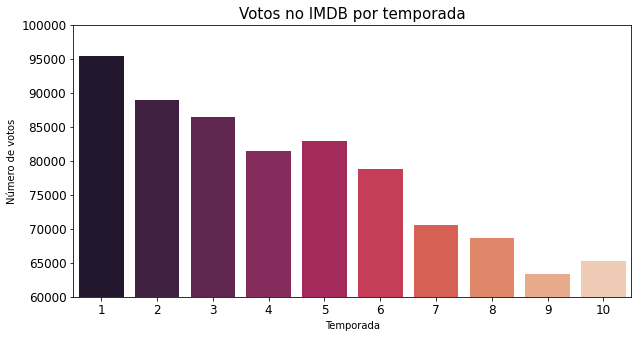

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x=Votos_IMDB.Temporada, y=Votos_IMDB.Votos_IMDB, palette='rocket')
plt.title('Votos no IMDB por temporada', fontsize=15)
plt.xlabel('Temporada')
plt.ylabel('Número de votos')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(60000, 100000)

(60000.0, 100000.0)

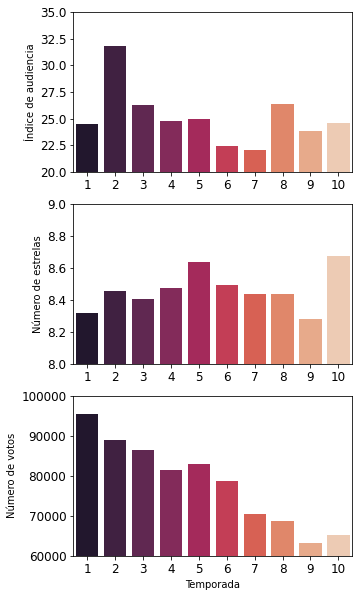

In [26]:
plt.figure(figsize=(5,10))

plt.subplot(3, 1, 1)
sns.barplot(x=audienciaxtemp_df.Temporada, y=audienciaxtemp_df.Audiencia, palette='rocket')
plt.ylabel('Índice de audiencia')
plt.xlabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(20, 35)

plt.subplot(3, 1, 2)
sns.barplot(x=estrelasxtemp_df.Temporada, y=estrelasxtemp_df.Estrelas_IMDB, palette='rocket')
plt.ylabel('Número de estrelas')
plt.xlabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(8, 9)

plt.subplot(3, 1, 3)
sns.barplot(x=Votos_IMDB.Temporada, y=Votos_IMDB.Votos_IMDB, palette='rocket')
plt.xlabel('Temporada')
plt.ylabel('Número de votos')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(60000, 100000)

Plotando os gráficos em uma única imagem, facilita a vizualização de uma possível correlação. 
- Em relação a quantidade de votos X média de estrelas é possível observar que a temporada 1 teve quase 100K de votos entretanto sua média de estrelas no IMDB foi a segunda mais baixa ficando à frente apenas da temporada 9 demonstrando que mesmo não tendo uma audiencia tão relevante, aqueles que assistiram parecem não ter gostado da série no primeiro momento.
- A temporada 2 foi a que teve maior audiencia na série toda, consequentemente também teve muitos votos, porém, menos que a temporada 1. Por outro lado, mesmo tendo tanta audiencia, sua média de estrelas no IMDB são foi tão alta ficando  em quinto lugar entre todas as temporadas.
- A temporada 9 foi a menos assistida,  consequentemente teve menor quantidade de votos e menor nota no ranking de estrelas.
- A temporada 10 por sua vez teve audiencia 'ok', mas o que mais chama atenção foi a baixa quantidade de votos X média de estrelas, onde é possível observar o inverso da primeira temporada onde teve muitos votos e uma nota baixa, no caso da ultima temporada os telespectadores parecem ter gostado muito pois foram muitas notas altas o que torna a décima temporada a primeira no ranking mesmo com número baixo de votos se comparado as temporadas iniciais.

Por hora é isso que pode ser observado, a seguir podemos analizar quais EPs obtiveram as melhores notas.

In [27]:
epsmelhorranking_df = main_df[['Titulo_orig', 'Sinopse_orig','Diretor', 'Estrelas_IMDB']].sort_values('Estrelas_IMDB', ascending=False).head(10).reset_index(drop=True)
display(epsmelhorranking_df)

,Titulo_orig,Sinopse_orig,Diretor,Estrelas_IMDB
0,The Last One II,Phoebe races Ross to the airport in a bid to s...,Kevin Bright,9.7
1,The One Where Everybody Finds Out,When Phoebe finds out about Monica and Chandle...,Michael Lembeck,9.7
2,The One with the Embryos,Phoebe's uterus is examined for implantation o...,Kevin Bright,9.5
3,The Last One I,Erica gives birth to the baby that Monica and ...,Kevin Bright,9.5
4,The One with the Prom Video,The gang watches a home video from the night o...,James Burrows,9.4
5,The One with the Proposal II,Chandler continues to pretend to hate the idea...,Kevin Bright,9.3
6,The One with the Videotape,Ross and Rachel tell everyone about the night ...,Kevin Bright,9.3
7,The One with the Rumor,"Monica invites Will, an old school friend of h...",Gary Halvorson,9.3
8,The One with Monica and Chandler's Wedding: Pa...,Ross tries to find Chandler with Phoebe's help...,Kevin Bright,9.2
9,The One with Ross's Wedding II,Phoebe tries to warn the gang that Rachel is c...,Kevin Bright,9.2


Na tabela acima é possível notar que o nome do diretor Kevin Bright aparece diversas vezes, coincidencia que ele apareça tanto nos EPs com maiores notas? talvez, mas essa é uma coincidencia que os telespectadores gostaram.

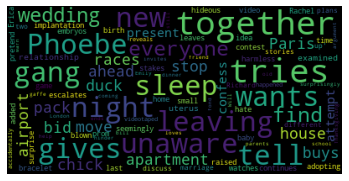

In [28]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
retirar = {"Rachel","Ross","Monica","Phoebe","Joey","Chandler", "summaryÂ", "see", 'full', 'meanwhile', 'back', 'higher', 'one',}
stopwords.update(retirar)
wordcloud = WordCloud(    background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40,                          
                          random_state=42
                         ).generate("".join(epsmelhorranking_df['Sinopse_orig']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

A imagem acima mostra as palavras que mais foram citadas nas sinopses dos EPs com maiores notas, o que pode ser de grande ajuda na hora de se escrever um novo roteiro, por exemplo, é possível notar que a personagem Phoebe teve muita participação, o que pode indicar que o público gosta das histórias em que essa personagem aparece. Casamento, união, querer e tentar também são palavras em destaque, indicando que possívelmente algum roteiro com tema romantico pode agradar o público.

Abaixo farei a mesma analize mas dessa vez os dados serão filtrados pelos EPs com maior audiencia.



In [29]:
epsmelhoraud_df = main_df[['Titulo_orig', 'Sinopse_orig','Diretor', 'Audiencia']].sort_values('Audiencia', ascending=False).head(10).reset_index(drop=True)
display(epsmelhoraud_df)

,Titulo_orig,Sinopse_orig,Diretor,Audiencia
0,The One with the Prom Video,The gang watches a home video from the night o...,James Burrows,52.90
1,The One After the Superbowl: Part 2,"Ross finds Marcel on the set of a new movie, w...",Michael Lembeck,52.90
2,The Last One II,Phoebe races Ross to the airport in a bid to s...,Kevin Bright,52.46
3,The One Where Rachel Has a Baby: Part 2,"After Rachel gives birth to her baby, she must...",Kevin Bright,34.91
4,The One Where Emma Cries,"Chandler, having trouble getting enough sleep ...",Sheldon Epps,34.01
5,The One Where Ross and Rachel... You Know,Monica becomes infatuated with a friend of her...,Michael Lembeck,33.60
6,The One Where Joey Moves Out,Joey and Chandler's friendship is jeopardized ...,Michael Lembeck,32.90
7,The One with Phoebe's Dad,"Phoebe tracks down her father, but isn't sure ...",Kevin Bright,32.90
8,The One with the Lesbian Wedding,Rachel's mom comes to visit with big news. Mon...,Thomas Schlamme,32.20
9,The One with the Breast Milk,Monica goes shopping with Julie and tries to k...,Michael Lembeck,32.10


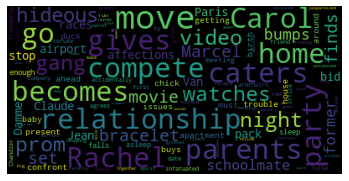

In [30]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
retirar = {"Rachel","Ross","Monica","Phoebe","Joey","Chandler", "summaryÂ", "see", 'full', 'meanwhile', 'back', 'higher', 'one','new','leaving'}
stopwords.update(retirar)
wordcloud = WordCloud(    background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40,                          
                          random_state=42
                         ).generate("".join(epsmelhoraud_df['Sinopse_orig']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Como anteriormente a imagem acima mostra as palavras que mais foram citadas nas sinopses dos EPs, dessa vez com maior audiencia. Dessa vez palavras como festa, competir, relacionamento e as personagens Rachel e Carol entraram em destaque. Essas palavras tem forte tendencia a roteiros mais romanticos envolvendo relacionamentos, talvez seja uma ideia boa passar essas informações para o roteirista.

A seguir analises envolvendo os diretores

In [31]:
diretor_rating_df = main_df.groupby("Diretor").Estrelas_IMDB.agg(['count','mean']).sort_values(by="mean", ascending=False)
display(diretor_rating_df)

,count,mean
Diretor,,
Joe Regalbuto,1,9.100000
Pamela Fryman,2,8.700000
Kevin Bright,52,8.646154
Andrew Tsao,1,8.600000
David Schwimmer,10,8.540000
Michael Lembeck,24,8.520833
James Burrows,14,8.514286
David Steinberg,1,8.500000
Mary Kay Place,1,8.500000


A tabela acima foi gerada a partir da media das notas que os diretores receberam nos EPs. Para fazer um top 3 não podemos considerar os primeiros colocados sendo os diretores Joe Regalbuto e Pamela Fryman, pois estes possuem apenas 1 e 2 votos respectivamente. Então usarei apenas diretores com mais de 10 votos:
    Diretor     Votos  Média
- Kevin Bright  	52	8.646154
- Michael Lembeck	24	8.520833	
- James Burrows	  14	8.514286	

Esses foram os diretores mais bem avaliados segundo o ranking do IMDB. A seguir farei o mesmo procedimento mas dessa vez ranqueando os diretores por média de audiencia:


In [32]:
diretor_audiencia_df = main_df.groupby("Diretor").Audiencia.agg(['count','mean']).sort_values(by="mean", ascending=False)
display(diretor_audiencia_df)

,count,mean
Diretor,,
Mary Kay Place,1,30.500000
Thomas Schlamme,2,30.000000
Andrew Tsao,1,29.300000
Sam Simon,1,28.300000
Michael Lembeck,24,28.218333
Ellen Gittelsohn,1,28.100000
Robby Benson,6,27.633333
Sheldon Epps,3,27.433333
Paul Lazarus,1,26.600000


Top 4 diretores que deram mais audiencia (com mais de 10 EPs)
Diretor           EPs Audiencia
- Michael Lembeck	24	28.218333
- James Burrows 	14	26.021429
- Gail Mancuso	  14	25.907143
- Kevin Bright	  52	25.825000

Desta vez adicionei mais um no TOP pois o diretor Kevin Brigth tem um número de Eps significante se comparado aos outros então ele entra na lista também.

In [33]:
escritores_df = pd.read_excel('/content/drive/MyDrive/DS/t1.xlsx')
escritores_df['Escrito_por'] = escritores_df['Escrito_por'].replace(';',' e ', regex=True)
escritores_df


,Unnamed: 0,Titulo_orig,Sinopse_orig,Escrito_por,Audiencia,Estrelas_IMDB
0,0,The One with the Sonogram at the End,Ross finds out his ex-wife is pregnant. Rachel...,David Crane e Marta Kauffman,21.50,8.1
1,1,The One with the Thumb,Monica becomes irritated when everyone likes h...,David Crane e Marta Kauffman,20.20,8.2
2,2,The One with George Stephanopoulos,Joey and Chandler take Ross to a hockey game t...,Jeffrey Astrof e Mike Sikowitz,19.50,8.1
3,3,The One with the East German Laundry Detergent,"Eager to spend time with Rachel, Ross pretends...",Alexa Junge,19.70,8.5
4,4,The One with the Butt,Monica's obsessiveness is put to the test afte...,Jeff Greenstein e Jeff Strauss,18.60,8.1
...,...,...,...,...,...,...
228,230,The One with Princess Consuela,When Phoebe goes to get her name changed she r...,Sherry Bilsing-Graham e Ellen Plummer,24.27,8.6
229,231,The One Where Estelle Dies,Ross tries to get Rachel to go back to Ralph L...,Robert Carlock e Tracy Reilly,22.83,8.5
230,232,The One with Rachel's Going Away Party,"The gang throws Rachel a goodbye party, during...",Mark Kunerth e David Crane e Marta Kauffman,22.64,8.9
231,233,The Last One I,Erica gives birth to the baby that Monica and ...,Andrew Reich e Ted Cohen,24.51,9.5


In [34]:
esc_aud_df = escritores_df[['Titulo_orig', 'Sinopse_orig','Escrito_por', 'Audiencia']].sort_values('Audiencia', ascending=False).head(10).reset_index(drop=True)
display(esc_aud_df)

esc_estrelas_df = escritores_df[['Titulo_orig', 'Sinopse_orig','Escrito_por', 'Estrelas_IMDB']].sort_values('Estrelas_IMDB', ascending=False).head(10).reset_index(drop=True)
display(esc_estrelas_df)
escritores_df.to_csv('asd.csv', sep=';')

,Titulo_orig,Sinopse_orig,Escrito_por,Audiencia
0,The One with the Prom Video,The gang watches a home video from the night o...,Michael Borkow,52.90
1,The One After the Superbowl: Part 2,"Ross finds Marcel on the set of a new movie, w...",Jeffrey Astrof e Mike Sikowitz,52.90
2,The Last One II,Phoebe races Ross to the airport in a bid to s...,Marta Kauffman e David Crane,52.46
3,The One Where Rachel Has a Baby: Part 2,"After Rachel gives birth to her baby, she must...",Scott Silveri,34.91
4,The One Where Emma Cries,"Chandler, having trouble getting enough sleep ...",Sherry Bilsing-Graham e Ellen Plummer,34.01
5,The One Where Ross and Rachel... You Know,Monica becomes infatuated with a friend of her...,Alexa Junge,33.60
6,The One Where Joey Moves Out,Joey and Chandler's friendship is jeopardized ...,Michael Curtis e Gregory S. Malins,32.90
7,The One with Phoebe's Dad,"Phoebe tracks down her father, but isn't sure ...",David Crane e Marta Kauffman,32.90
8,The One with the Lesbian Wedding,Rachel's mom comes to visit with big news. Mon...,David Crane e Marta Kauffman,32.20
9,The One with the Breast Milk,Monica goes shopping with Julie and tries to k...,Jeffrey Astrof e Mike Sikowitz,32.10


,Titulo_orig,Sinopse_orig,Escrito_por,Estrelas_IMDB
0,The Last One II,Phoebe races Ross to the airport in a bid to s...,Marta Kauffman e David Crane,9.7
1,The One Where Everybody Finds Out,When Phoebe finds out about Monica and Chandle...,Michael Curtis e Seth Kurland,9.7
2,The One with the Embryos,Phoebe's uterus is examined for implantation o...,Seth Kurland,9.5
3,The Last One I,Erica gives birth to the baby that Monica and ...,Andrew Reich e Ted Cohen,9.5
4,The One with the Prom Video,The gang watches a home video from the night o...,Michael Borkow,9.4
5,The One with the Proposal II,Chandler continues to pretend to hate the idea...,Shana Goldberg-Meehan e Scott Silveri,9.3
6,The One with the Videotape,Ross and Rachel tell everyone about the night ...,Sherry Bilsing e Ellen Plummer,9.3
7,The One with the Rumor,"Monica invites Will, an old school friend of h...",Andrew Reich e Ted Cohen,9.3
8,The One with Monica and Chandler's Wedding: Pa...,Ross tries to find Chandler with Phoebe's help...,Gregory S. Malins,9.2
9,The One with Ross's Wedding II,Phoebe tries to warn the gang that Rachel is c...,Michael Borkow,9.2


respondendo a pergunta de que a produção interefere na audiencia: SIM

In [35]:
main_df = pd.read_excel('/content/drive/MyDrive/DS/database.xlsx')

#main_df = pd.merge(main_df, escritores_df['Escrito_por'] )

main_df = main_df.drop('Unnamed: 0', axis=1)
display(main_df)

,Temporada,Episodio,Exibicao_orig,Titulo_orig,Duracao,Sinopse_orig,Diretor,Escrito_por,Audiencia,Estrelas_IMDB,Votos_IMDB
0,1,1,22 de setembro de 1994,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,David Crane e Marta Kauffman,21.50,8.1,4888
1,1,2,29 de setembro de 1994,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,David Crane e Marta Kauffman,20.20,8.2,4605
2,1,3,6 de outubro de 1994,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,Jeffrey Astrof e Mike Sikowitz,19.50,8.1,4468
3,1,4,13 de outubro de 1994,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,Alexa Junge,19.70,8.5,4438
4,1,5,20 de outubro de 1994,The One with the Butt,22,Monica's obsessiveness is put to the test afte...,Arlene Sanford,Jeff Greenstein e Jeff Strauss,18.60,8.1,4274
...,...,...,...,...,...,...,...,...,...,...,...
228,10,231,19 de fevereiro de 2004,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,Sherry Bilsing-Graham e Ellen Plummer,24.27,8.6,2989
229,10,232,26 de fevereiro de 2004,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,Robert Carlock e Tracy Reilly,22.83,8.5,2771
230,10,233,22 de abril de 2004,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,Mark Kunerth e David Crane e Marta Kauffman,22.64,8.9,3141
231,10,234,29 de abril de 2004,The Last One I,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,Andrew Reich e Ted Cohen,24.51,9.5,6221


In [36]:
#main_df = main_df.drop('Escrito_por', axis=1)
#tst2 = escritores_df
#main_df = pd.merge(main_df, tst2)

#tst2 = tst2.drop(['Unnamed: 0','Titulo_orig','Sinopse_orig','Audiencia','Estrelas_IMDB'], axis=1 )
#main_df


In [37]:
correlate_df  = main_df[['Diretor', 'Escrito_por', 'Audiencia', 'Estrelas_IMDB', 'Votos_IMDB']]

correlate_df



,Diretor,Escrito_por,Audiencia,Estrelas_IMDB,Votos_IMDB
0,James Burrows,David Crane e Marta Kauffman,21.50,8.1,4888
1,James Burrows,David Crane e Marta Kauffman,20.20,8.2,4605
2,James Burrows,Jeffrey Astrof e Mike Sikowitz,19.50,8.1,4468
3,Pamela Fryman,Alexa Junge,19.70,8.5,4438
4,Arlene Sanford,Jeff Greenstein e Jeff Strauss,18.60,8.1,4274
...,...,...,...,...,...
228,Gary Halvorson,Sherry Bilsing-Graham e Ellen Plummer,24.27,8.6,2989
229,Gary Halvorson,Robert Carlock e Tracy Reilly,22.83,8.5,2771
230,Gary Halvorson,Mark Kunerth e David Crane e Marta Kauffman,22.64,8.9,3141
231,Kevin Bright,Andrew Reich e Ted Cohen,24.51,9.5,6221


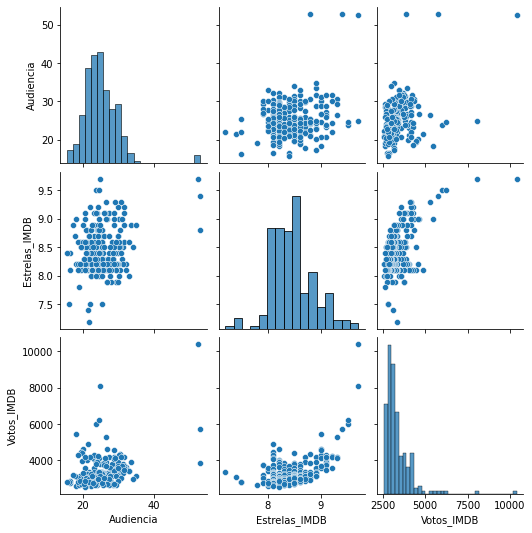

In [38]:
sns.pairplot(correlate_df)

plt.show()

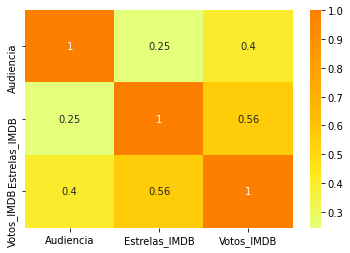

In [39]:
sns.heatmap(correlate_df.corr(), cmap='Wistia', annot=True)

In [40]:
train_df = correlate_df[['Diretor', 'Escrito_por', 'Audiencia']]
train_df

,Diretor,Escrito_por,Audiencia
0,James Burrows,David Crane e Marta Kauffman,21.50
1,James Burrows,David Crane e Marta Kauffman,20.20
2,James Burrows,Jeffrey Astrof e Mike Sikowitz,19.50
3,Pamela Fryman,Alexa Junge,19.70
4,Arlene Sanford,Jeff Greenstein e Jeff Strauss,18.60
...,...,...,...
228,Gary Halvorson,Sherry Bilsing-Graham e Ellen Plummer,24.27
229,Gary Halvorson,Robert Carlock e Tracy Reilly,22.83
230,Gary Halvorson,Mark Kunerth e David Crane e Marta Kauffman,22.64
231,Kevin Bright,Andrew Reich e Ted Cohen,24.51


In [41]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

train_df['Diretor'] = label_encoder.fit_transform(train_df['Diretor'])
train_df['Escrito_por'] = label_encoder.fit_transform(train_df['Escrito_por'])

train_df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Diretor,Escrito_por,Audiencia
0,10,22,21.50
1,10,22,20.20
2,10,38,19.50
3,15,3,19.70
4,2,36,18.60
...,...,...,...
228,9,74,24.27
229,9,60,22.83
230,9,42,22.64
231,12,8,24.51


In [69]:
print(train_df.sort_values(by='Audiencia', ascending=False))

     Diretor  Escrito_por  Audiencia
36        10           45      52.90
35        14           38      52.90
232       12           44      52.46
191       12           61      34.91
192       21           74      34.01
..       ...          ...        ...
167       12           29      17.23
153        5           52      16.57
164        9            8      16.55
165        9           64      16.30
166       12           25      15.65

[233 rows x 3 columns]


In [66]:
from sklearn.model_selection import train_test_split

x = train_df.drop('Audiencia', axis=1)
y = train_df['Audiencia']

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.20)

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


linear = LinearRegression()
randomforest = RandomForestRegressor()
extratree = ExtraTreesRegressor()

linear.fit(x_treino, y_treino)
randomforest.fit(x_treino, y_treino)
extratree.fit(x_treino, y_treino)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [68]:
from sklearn import metrics

teste_linear = linear.predict(x_teste)
teste_random = randomforest.predict(x_teste)
teste_extra = extratree.predict(x_teste)

r2_linear = metrics.r2_score(y_teste, teste_linear)
r2_random = metrics.r2_score(y_teste, teste_random)
r2_extra = metrics.r2_score(y_teste, teste_extra)


print(r2_linear)
print(r2_random)
print(r2_extra)
print('='*5)
erro_linear = metrics.mean_squared_error(y_teste, teste_linear)
erro_random = metrics.mean_squared_error(y_teste, teste_random)
erro_extratree = metrics.mean_squared_error(y_teste, teste_extra)


print(erro_linear)

print(erro_random)
print(erro_extratree)
print('='*5)

0.05169710390718363
0.19866067065096804
0.2772555960609898
=====
26.213287697617194
22.15087444126695
19.97832872846337
=====


,Audiencia real,Previsão random
9,19.90,27.728856
62,27.30,43.497967
11,24.00,21.849600
175,24.24,23.032800
155,23.26,23.622225
46,26.10,29.014958
1,20.20,22.823502
183,28.64,22.645400
217,22.38,23.790347
147,27.93,22.909090


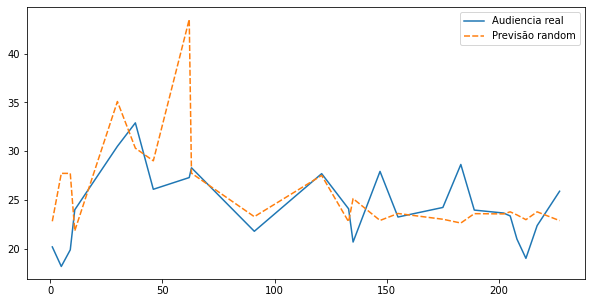

In [62]:
tabela_comp = pd.DataFrame()
tabela_comp['Audiencia real'] = y_teste
tabela_comp['Previsão random'] = teste_random

display(tabela_comp)
plt.figure(figsize=(10,5))
sns.lineplot(data=tabela_comp)

In [76]:

#print(randomforest.feature_importances_)
randomforest.predict([['12', '38']])

array([30.82713333])

In [ ]:
     Diretor  Escrito_por  Audiencia
36        10           45      52.90
35        14           38      52.90
232       12           44      52.46